In [1]:
import csv
import pandas as pd
import pickle
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
ospath = os.path.abspath('C:/Users/Leonard/Downloads/Dataset/F1_All_Traffic.csv')

In [ ]:
data1 = pd.read_csv(ospath)

In [ ]:
data1.columns.values

In [ ]:
data1[data1.columns.values[14:35]].head(30)

In [2]:
def roundTime(dt=None, dateDelta=datetime.timedelta(minutes=1)):
    """Round a datetime object to a multiple of a timedelta
    dt : datetime.datetime object, default now.
    dateDelta : timedelta object, we round to a multiple of this, default 1 minute.
    Author: Thierry Husson 2012 - Use it as you want but don't blame me.
            Stijn Nevens 2014 - Changed to use only datetime objects as variables
    """
    roundTo = dateDelta.total_seconds()

    if dt == None : dt = datetime.datetime.now()
    seconds = (dt - dt.min).seconds
    # // is a floor division, not a comment on following line:
    rounding = (seconds+roundTo/2) // roundTo * roundTo
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [ ]:
roundTime(datetime.datetime(2016,12,31,23,37,32),datetime.timedelta(minutes=15))

In [ ]:
datetime.datetime.strptime('2016-12-16 02:00:52','%Y-%m-%d %H:%M:%S')

In [ ]:
data1['update_time_datetime'] = data1.apply(lambda x: datetime.datetime.strptime(x['update_time'],'%Y-%m-%d %H:%M:%S'),axis=1)

In [ ]:
data1['update_time15'] = data1.apply(lambda x: roundTime(x['update_time_datetime'],datetime.timedelta(minutes=15)),axis=1)

In [ ]:
list(data1.info_5.unique())[0] is not np.nan

In [ ]:
data1['sent_bytes'] = data1.apply(lambda x: int(x['info_5'].split('; ')[1].split('=')[1]) if x['info_5'] is not np.nan else 0,axis=1)
data1['rcvd_bytes'] = data1.apply(lambda x: int(x['info_5'].split('; ')[2].split('=')[1]) if x['info_5'] is not np.nan else 0,axis=1)

In [ ]:
data1.fillna(0,inplace=True)

In [ ]:
min(data1.update_time15.values)

In [ ]:
data1[(data1.update_time15>=datetime.datetime(2017,1,2,0,0,0)) & (data1.update_time15<datetime.datetime(2017,1,5,0,0,0))].groupby(['update_time15'])['rcvd_bytes','sent_bytes'].sum().apply(lambda x: x/1024/1024/1024).plot(kind='line',figsize=(12,6))

In [ ]:
int('duration=30; sent_bytes=75; rcvd_bytes=234'.split('; ')[2].split('=')[1])

In [4]:
path = os.path.abspath('F:/bda_project_files/dataset')

In [14]:
datadict = {}
for root, _ , files in os.walk(path):
    for file in files:
        print(root,file)
        filep = file[3:]
        if filep[-4:]=='.csv':
            filep = filep.replace('_modified','')
            if filep in datadict: 
                tempdata = pd.read_csv(os.path.join(root,file),parse_dates=['update_time'],infer_datetime_format=True)
                tempdata.dropna(axis=0,how='all',inplace=True)
                datadict[filep] = pd.concat([datadict[filep],tempdata])
            else:
                tempdata = pd.read_csv(os.path.join(root,file),parse_dates=['update_time'],infer_datetime_format=True)
                tempdata.dropna(axis=0,how='all',inplace=True)
                datadict[filep] = tempdata
    

F:\bda_project_files\dataset F1_All_Traffic.csv
F:\bda_project_files\dataset F1_Device_Statistic.csv
F:\bda_project_files\dataset F1_GWC_Statistic.csv
F:\bda_project_files\dataset F2_All_Traffic_modified.csv


C:\Users\Leonard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


F:\bda_project_files\dataset F2_Device_Statistic_modified.csv
F:\bda_project_files\dataset F2_GWC_Statistic_modified.csv
F:\bda_project_files\dataset F3_All_Traffic_modified.csv


C:\Users\Leonard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,16,25,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


F:\bda_project_files\dataset F3_Device_Statistic_modified.csv


In [6]:
for k,v in datadict.items():
    print(k,v.columns.values)

Device_Statistic.csv ['Unnamed: 0' 'sid' 'cluster' 'raw_id' 'device' 'unix_time' 'in_octets'
 'out_octets' 'log_type' 'update_time']
GWC_Statistic.csv ['Unnamed: 0' 'sid' 'appliance_id' 'cluster' 'ssid' 'radio' 'band'
 'rcvd_bytes' 'sent_bytes' 'client_count' 'log_type' 'update_time' 'wap']
All_Traffic.csv ['Unnamed: 0' 'sid' 'cluster' 'tag_id' 'raw_id' 'disp' 'direction' 'pri'
 'policy' 'protocol' 'src_ip' 'src_port' 'dst_ip' 'dst_port' 'src_ip_nat'
 'src_port_nat' 'dst_ip_nat' 'dst_port_nat' 'src_intf' 'dst_intf' 'rc'
 'pckt_len' 'ttl' 'pr_info' 'proxy_act' 'alarm_name' 'alarm_type'
 'alarm_id' 'info_1' 'info_2' 'info_3' 'info_4' 'info_5' 'info_6'
 'log_type' 'msg' 'bucket' 'update_time' 'info_7' 'info_8' 'info_9'
 'info_10' 'info_11' 'info_12' 'msg_id']


In [8]:
# datadict['All_Traffic.csv'].dropna(axis=0,how='all',inplace=True)

In [7]:
datadict['All_Traffic.csv'].head()

,Unnamed: 0,sid,cluster,tag_id,raw_id,disp,direction,pri,policy,protocol,...,msg,bucket,update_time,info_7,info_8,info_9,info_10,info_11,info_12,msg_id
0,0,1116303749,NaN,1001,331473,2,0,4,Unhandled-External-Packet-00,34295/udp,...,Denied,NaN,2016-12-16 02:00:10,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
1,1,1116303750,NaN,1001,331474,2,0,4,Unhandled-External-Packet-00,telnet/tcp,...,Denied,NaN,2016-12-16 02:00:13,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
2,2,1116303926,NaN,1001,331477,2,0,4,Unhandled-External-Packet-00,telnet/tcp,...,Denied,NaN,2016-12-16 02:00:51,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
3,3,1116303927,NaN,1001,331478,2,0,4,Unhandled-External-Packet-00,telnet/tcp,...,Denied,NaN,2016-12-16 02:00:52,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
4,4,1116303928,NaN,1001,331479,2,0,4,Unhandled-External-Packet-00,7547/tcp,...,Denied,NaN,2016-12-16 02:00:52,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148


In [10]:
import sys

In [11]:
for col in datadict['All_Traffic.csv'].columns.values:
    print("{}: {:.0f}MB".format(col,sys.getsizeof( datadict['All_Traffic.csv'][col])/1024/1024))

Unnamed: 0: 89MB
sid: 89MB
cluster: 89MB
tag_id: 89MB
raw_id: 89MB
disp: 89MB
direction: 89MB
pri: 89MB
policy: 462MB
protocol: 407MB
src_ip: 426MB
src_port: 89MB
dst_ip: 432MB
dst_port: 89MB
src_ip_nat: 405MB
src_port_nat: 89MB
dst_ip_nat: 222MB
dst_port_nat: 89MB
src_intf: 434MB
dst_intf: 434MB
rc: 89MB
pckt_len: 89MB
ttl: 89MB
pr_info: 341MB
proxy_act: 89MB
alarm_name: 222MB
alarm_type: 222MB
alarm_id: 89MB
info_1: 89MB
info_2: 89MB
info_3: 89MB
info_4: 89MB
info_5: 364MB
info_6: 89MB
log_type: 372MB
msg: 336MB
bucket: 89MB
update_time: 466MB
info_7: 89MB
info_8: 89MB
info_9: 89MB
info_10: 89MB
info_11: 89MB
info_12: 89MB
msg_id: 411MB


In [15]:
forecast_data = datadict['All_Traffic.csv'][['update_time','info_5']].fillna(0)
print("{:.0f}MB".format(sys.getsizeof( forecast_data)/1024/1024))

408MB


In [28]:
forecast_data['sent_bytes'] = [int(x.split('; ')[1].split('=')[1]) if x!=0 else 0 for x in forecast_data['info_5'].tolist()]
forecast_data['rcvd_bytes'] = [int(x.split('; ')[2].split('=')[1]) if x!=0 else 0 for x in forecast_data['info_5'].tolist()]

In [61]:
# Truncating the dates is very slow for some reason, made this loop to know how long it took

outlist = []
inlist = forecast_data['update_time'].tolist()
length = len(inlist)
for index, x in enumerate(inlist):
    outlist.append(roundTime(x.to_pydatetime(),datetime.timedelta(minutes=15)))
    if index % 1000000 == 0:
        print("{:.0f} rows left".format(length-index))
# [roundTime(x,datetime.timedelta(minutes=15)) for x in forecast_data['update_time'].tolist()]


5821274 rows left
4821274 rows left
3821274 rows left
2821274 rows left
1821274 rows left
821274 rows left


In [62]:
forecast_data['update_time15'] = outlist

In [59]:
# print(inlist[:5],'\n',outlist[:5],roundTime(inlist[0].to_pydatetime(),datetime.timedelta(minutes=15)))

[Timestamp('2016-12-16 02:00:10'), Timestamp('2016-12-16 02:00:13'), Timestamp('2016-12-16 02:00:51'), Timestamp('2016-12-16 02:00:52'), Timestamp('2016-12-16 02:00:52')] 
 [Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44')] 2016-12-16 02:00:00


In [ ]:
# updatetime = map(roundTime(),inlist,datetime.timedelta(minutes=15))

In [63]:
forecast_data.head()

,update_time,info_5,sent_bytes,rcvd_bytes,update_time15
0,2016-12-16 02:00:10,0,0,0,2016-12-16 02:00:00
1,2016-12-16 02:00:13,0,0,0,2016-12-16 02:00:00
2,2016-12-16 02:00:51,0,0,0,2016-12-16 02:00:00
3,2016-12-16 02:00:52,0,0,0,2016-12-16 02:00:00
4,2016-12-16 02:00:52,0,0,0,2016-12-16 02:00:00


In [110]:
forecast_data_2 = forecast_data.groupby('update_time15')[['sent_bytes','rcvd_bytes']].sum().reset_index()
forecast_data_2['hour'] = [x.hour for x in forecast_data_2.update_time15]
forecast_data_2['min'] = [x.minute for x in forecast_data_2.update_time15]
forecast_data_2['dow'] = [x.weekday() for x in forecast_data_2.update_time15]
forecast_data_2['day'] = [x.day for x in forecast_data_2.update_time15]
forecast_data_2['month'] = [x.month for x in forecast_data_2.update_time15]
forecast_data_2['traffic'] = (forecast_data_2.sent_bytes+forecast_data_2.rcvd_bytes)/1024/1024

In [111]:
forecast_data_2

,update_time15,sent_bytes,rcvd_bytes,hour,min,dow,day,month,traffic
0,2016-12-16 02:00:00,10312,26532,2,0,4,16,12,0.035137
1,2016-12-16 02:15:00,9776,26516,2,15,4,16,12,0.034611
2,2016-12-16 02:30:00,144026,146568,2,30,4,16,12,0.277132
3,2016-12-16 02:45:00,12338,56552,2,45,4,16,12,0.065699
4,2016-12-16 03:00:00,332556,18511495,3,0,4,16,12,17.971087
5,2016-12-16 03:15:00,268161,12195421,3,15,4,16,12,11.886198
6,2016-12-16 03:30:00,2609,8440,3,30,4,16,12,0.010537
7,2016-12-16 03:45:00,1725,4205,3,45,4,16,12,0.005655
8,2016-12-16 04:00:00,14523,18267,4,0,4,16,12,0.031271
9,2016-12-16 04:15:00,113790,55959,4,15,4,16,12,0.161885


In [132]:
f = open('forecastdata.p','wb')
pickle.dump(forecast_data_2,f)
f.close()

In [3]:
forecast_data_2 = pickle.load(open('forecastdata.p','rb'))

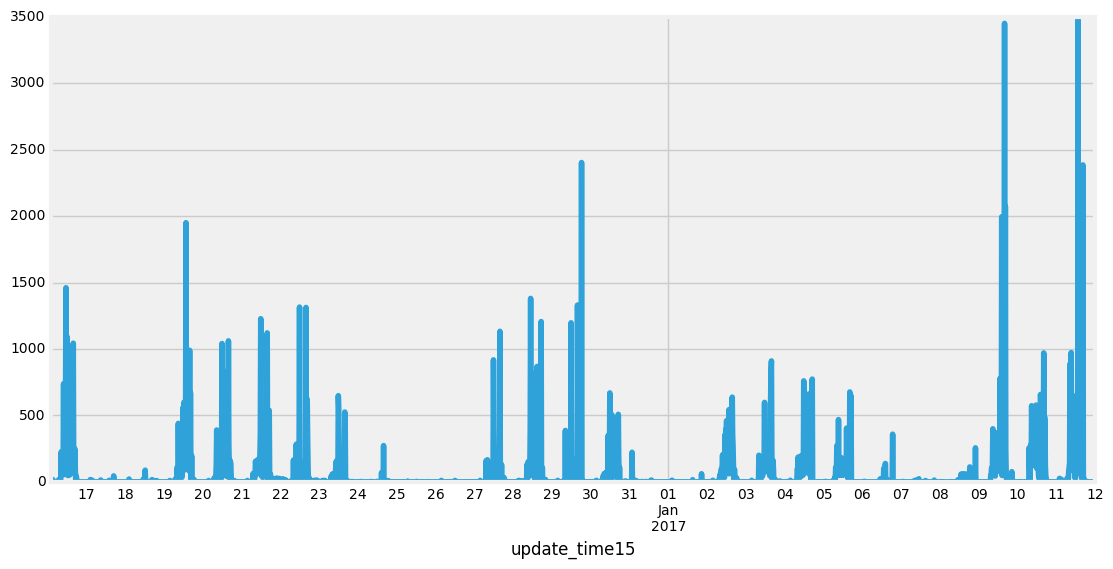

In [4]:
forecast_data_2.set_index('update_time15')['traffic'].plot(kind='line',figsize=(12,6))

In [31]:
forecast_data_2.drop('month',axis=1,inplace=True)

In [32]:
traindata = forecast_data_2[forecast_data_2.update_time15<=datetime.datetime(2017,1,6,0,0,0)]
testdata = forecast_data_2[forecast_data_2.update_time15>datetime.datetime(2017,1,6,0,0,0)]

In [33]:
X_train = np.array(traindata[traindata.columns.values[3:-1]])
X_test = np.array(testdata[traindata.columns.values[3:-1]])
y_train = np.array(traindata[traindata.columns.values[-1]])
y_test = np.array(testdata[traindata.columns.values[-1]])

In [34]:
print(X_train.shape,y_train.shape ,X_test.shape,y_test.shape)

(2009, 4) (2009,) (576, 4) (576,)


In [35]:
# y_test.T

In [36]:
import tpot
from tpot import TPOTRegressor

In [11]:
def MAP_error(y_true, y_pred):
    return float(sum(np.abs((y_pred - y_true)/y_true))) / len(y_true)

In [38]:
regr = TPOTRegressor(generations=10,population_size=50,verbosity=2,num_cv_folds=5,scoring='mean_squared_error')
regr.fit(X_train,y_train)

Generation 1 - Current best internal CV score: 23003.89381066155


Timeout during evaluation of pipeline #65. Skipping to the next pipeline.


Timeout during evaluation of pipeline #73. Skipping to the next pipeline.


Generation 2 - Current best internal CV score: 23003.89381066155


Generation 3 - Current best internal CV score: 20489.737335459984


Generation 4 - Current best internal CV score: 20489.737335459984


Generation 5 - Current best internal CV score: 20489.737335459984


Generation 6 - Current best internal CV score: 20489.737335459984


Generation 7 - Current best internal CV score: 20489.737335459984


Generation 8 - Current best internal CV score: 20413.91916707636


Generation 9 - Current best internal CV score: 20413.91916707636


Generation 10 - Current best internal CV score: 20340.74287052705



Best pipeline: ExtraTreesRegressor(VarianceThreshold(ElasticNet(input_matrix, 42.0, 0.83999999999999997), 26.0), 0.69000000000000006)


In [44]:
regr.export('goodtpotmodel.py')

In [ ]:
Best pipeline: GradientBoostingRegressor(KNeighborsRegressor(GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, 0.70000000000000007), 0.10000000000000001, 0.0001), 28, 35), 23.0, 14.0)
Best pipeline: ExtraTreesRegressor(VarianceThreshold(ElasticNet(input_matrix, 42.0, 0.83999999999999997), 26.0), 0.69000000000000006)

In [39]:
print(regr.predict(X_test),y_test)

[  3.14337931e-01   5.51523808e-01   5.87071283e-01   1.92936129e-01
   1.46132858e+00   6.28098297e-01   9.38130825e-01   1.04258474e+00
   1.49912968e+00   7.19318751e-01   1.90309418e-01   6.05958120e+00
   5.00272460e+00   1.35524475e+00   5.17925270e-01   3.01628326e-01
   1.59411186e-01   1.87203520e-01   1.96920187e-01   1.75394260e-01
   2.63607685e-01   2.71685883e-01   1.37696044e+00   3.58333879e+00
   1.01840509e+00   4.33111427e-01   5.64893219e+00   2.05705691e+01
   2.22786347e+01   3.64637771e+01   3.42230113e+01   5.26706917e+01
   1.40595698e+02   7.10849612e+01   8.96026164e+01   1.19958590e+02
   2.01907849e+02   1.29380563e+02   3.06443056e+02   1.23324193e+02
   1.94606621e+02   2.38021052e+02   2.39762824e+02   3.21792029e+02
   4.80803818e+02   2.36643891e+02   4.43685428e+02   1.35613492e+02
   9.32709361e+01   6.48904785e+01   8.34391453e+01   1.09907562e+02
   1.19825345e+02   7.83391207e+01   1.25301341e+02   1.25847075e+02
   1.86560730e+02   9.99992032e+01

In [24]:
sum(np.abs(regr.predict(X_test)-y_test)/y_test)/len(y_test)

1.4246412497033374

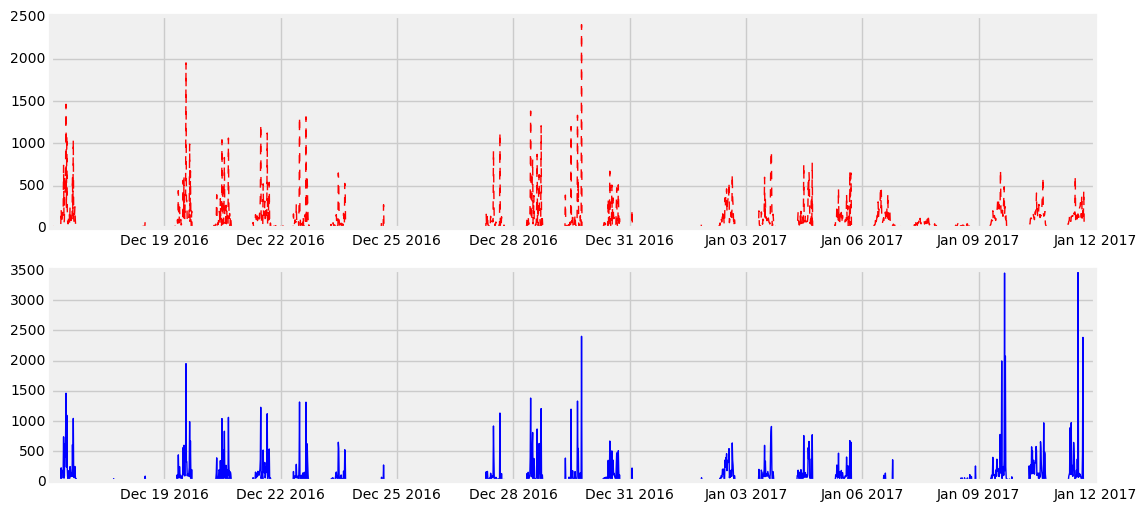

In [40]:
X_all = np.concatenate((X_train,X_test))
y_all = np.concatenate((y_train,y_test))

fig, ax = plt.subplots(nrows=2,figsize=(12,6))
ax[0].plot(np.array(forecast_data_2.update_time15),regr.predict(X_all),'r--',linewidth=1)
ax[1].plot(np.array(forecast_data_2.update_time15),y_all,'b',linewidth=1)
plt.show()



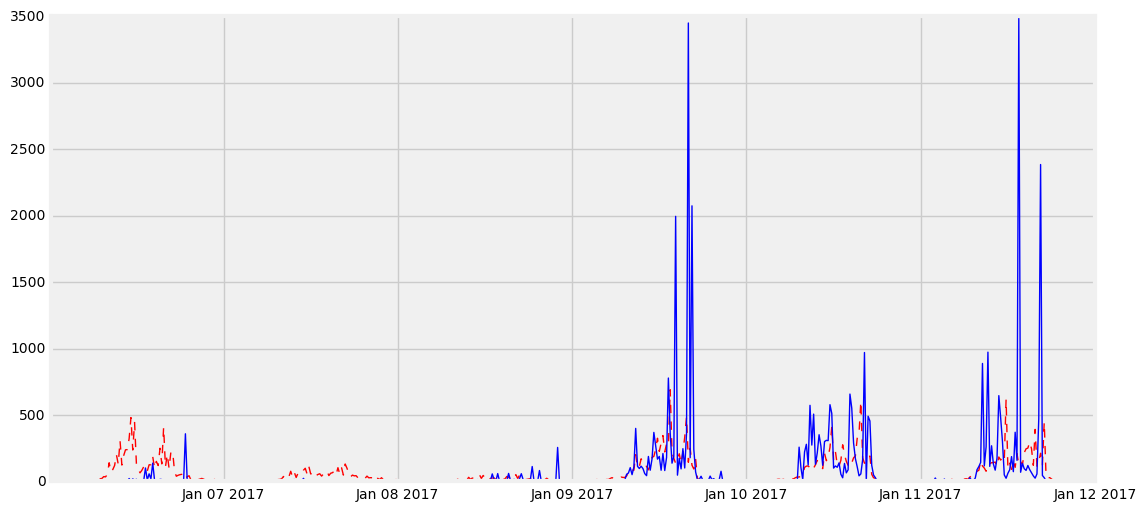

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.array(testdata.update_time15),regr.predict(X_test),'r--',linewidth=1)
ax.plot(np.array(testdata.update_time15),y_test,'b',linewidth=1)
plt.show()


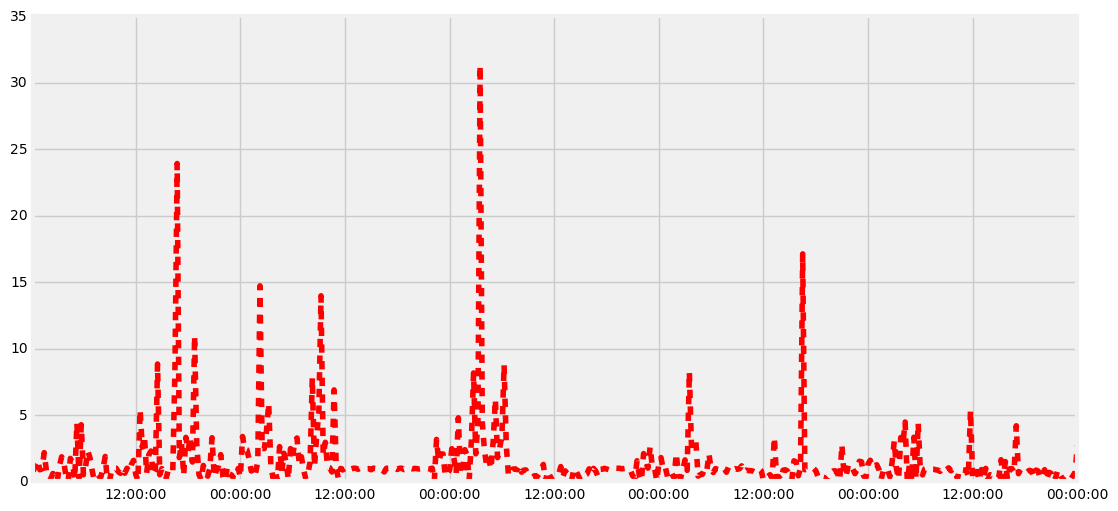

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.array(testdata.update_time15),np.abs((regr.predict(X_test)-y_test)/y_test),'r--')
plt.show()

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [93]:
reg = Pipeline()
reg = RandomForestRegressor()
reg.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [95]:
reg.score(X_test,y_test)

0.05140209343095814

In [13]:
# forecast_data['update_time_datetime'] = forecast_data.apply(lambda x: datetime.datetime.strptime(x['update_time'],'%Y-%m-%d %H:%M:%S'),axis=1)

KeyboardInterrupt: 

In [47]:
def ceil_dt(dt, delta):
    return dt + (datetime.datetime.min - dt) % delta
print((datetime.datetime.min-datetime.datetime.now()) % datetime.timedelta(minutes=15))
ceil_dt(datetime.datetime.now(),datetime.timedelta(minutes=15))

0:10:10.808236


datetime.datetime(2017, 1, 28, 15, 45)

In [ ]:
forecast_data.groupby(['update_time15'])['rcvd_bytes','sent_bytes'].sum().apply(lambda x: x/1024/1024/1024).plot(kind='line',figsize=(12,6))